Academy propose des contenus de formation __en ligne__ pour un public de niveau __lycée et université__\
Objectifs :
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
df_sources = pd.read_csv('./data/EdStatsCountry-Series.csv')
df_country = pd.read_csv('./data/EdStatsCountry.csv')
data = pd.read_csv('./data/EdStatsData.csv')
df_4 = pd.read_csv('./data/EdStatsFootNote.csv')
df_indicator_description = pd.read_csv('./data/EdStatsSeries.csv')

# Pré analyse

- Valider la qualité de ce jeu de données (comporte-t-il beaucoup de données manquantes, dupliquées ?)
- Décrire les informations contenues dans le jeu de données (nombre de colonnes ? nombre de lignes ?)
- Sélectionner les informations qui semblent pertinentes pour répondre à la problématique (quelles sont les colonnes contenant des informations qui peuvent être utiles pour répondre à la problématique de l’entreprise ?)
- Déterminer des ordres de grandeurs des indicateurs statistiques classiques pour les différentes zones géographiques et pays du monde (moyenne/médiane/écart-type par pays et par continent ou bloc géographique)

## AED

### Data

In [3]:
data.shape

(886930, 70)

In [4]:
#données manquantes
data[data.duplicated()]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69


In [5]:
#nombre de pays
data['Country Name'].nunique()

242

In [6]:
#nombre d'indicateurs
data['Indicator Code'].nunique()

3665

In [199]:
pour_nan = (pd.DataFrame(data.isnull().sum())[0].sum(axis=0)/data.size)*100
pour_nan

85.89840022994152

In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 69 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [8]:
data['Unnamed: 69'].unique()

array([nan])

In [9]:
data = data.drop(columns='Unnamed: 69')

In [10]:
data.groupby('Country Code').count()

,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,...,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,3665,3665,3665,49,49,49,49,49,49,49,...,308,308,308,308,308,308,308,308,308,308
AFG,3665,3665,3665,523,139,158,236,351,537,164,...,0,0,0,0,0,0,0,0,0,0
AGO,3665,3665,3665,49,95,114,65,55,49,49,...,0,0,0,0,0,0,0,0,0,0
ALB,3665,3665,3665,409,78,74,50,50,410,105,...,308,308,308,308,308,308,308,308,308,308
AND,3665,3665,3665,41,63,63,63,63,99,63,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,3665,3665,3665,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
YEM,3665,3665,3665,410,50,50,50,50,410,50,...,0,0,0,0,0,0,0,0,0,0
ZAF,3665,3665,3665,471,55,55,59,56,419,56,...,308,308,308,308,308,308,308,308,308,308


### Countries

le dataframe des pays contient pays + région mélangé. Afin de les séparer, j'utilise la colonne 'region'. Puis je filtre "à la main" les ,régions qui m'intéressent.

In [11]:
world_data = df_country[df_country['Country Code']=="WLD"]
region_data = df_country[(df_country['Region'].isnull())&(df_country['Country Code']!="WLD")]

In [12]:
region_data['Short Name'].unique()

array(['Arab World', 'East Asia & Pacific (developing only)',
       'East Asia & Pacific (all income levels)',
       'Europe & Central Asia (developing only)',
       'Europe & Central Asia (all income levels)', 'Euro area',
       'European Union', 'Gibraltar', 'High income',
       'Heavily indebted poor countries (HIPC)',
       'Latin America & Caribbean (developing only)',
       'Latin America & Caribbean (all income levels)',
       'Least developed countries: UN classification', 'Low income',
       'Lower middle income', 'Low & middle income',
       'Middle East & North Africa (all income levels)', 'Middle income',
       'Middle East & North Africa (developing only)', 'North America',
       'Nauru', 'OECD members', 'South Asia',
       'Sub-Saharan Africa (developing only)',
       'Sub-Saharan Africa (all income levels)', 'Upper middle income'],
      dtype=object)

In [13]:
region = [
    'Arab World',
    'East Asia & Pacific (all income levels)',
    'Europe & Central Asia (all income levels)',
    'Latin America & Caribbean (all income levels)',
    'Middle East & North Africa (all income levels)',
    'South Asia',
    'Sub-Saharan Africa (all income levels)',
    'North America'
]
region_interest_data = region_data[region_data['Short Name'].isin(region)]

In [14]:
df_countries = df_country[~df_country['Region'].isnull()]

### Indicators

👇👇👇 __Cette cellule permet de renseigner le code d'un indicateur pour avoir sa description complete__👇👇👇

In [15]:
select_indicator = df_indicator_description[df_indicator_description['Series Code']=='PRJ.POP.ALL.3.MF']
list(select_indicator['Long definition'])

["Total population in thousands that has completed upper secondary or incomplete post-secondary education as the highest level of educational attainment. Projections are based on collected census and survey data for the base year (around 2010) and the Medium Shared Socioeconomic Pathways (SSP2) projection model. The SSP2 is a middle-of-the-road scenario that combines medium fertility with medium mortality, medium migration, and the Global Education Trend (GET) education scenario. For more information and other projection models, consult the Wittgenstein Centre for Demography and Global Human Capital's website: http://www.oeaw.ac.at/vid/dataexplorer/"]

## Selection des indicateurs

### Trouver les indicateurs pour aujourd'hui

Afin de trouver ces indicateurs, je vais me baser sur la donnée récente, sans prendre en compte les valeurs prédites (entre 2000 et 2017).
Puis, pour voir les indicateurs ayant le plus de données, je vais les agréer en comptant puis sommer les valeurs sur l'axis 0.\
Enfin, je vais séléctioné parmis les indicateurs ceux contenant les termes "secondary", "tertiary" et "internet"

In [16]:
columns_name = list(data.columns)

In [17]:
COLUMNS_YEAR = columns_name[4:]

In [18]:
columns_interest_now = columns_name[:4] + columns_name[34:52]

In [19]:
data_interest = data[columns_interest_now]

In [20]:
data_year = data_interest.groupby('Indicator Name').count().reset_index()

In [21]:
data_year.head(2)

,Indicator Name,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,95,101,101,94,101,105,...,102,112,106,107,102,99,85,3,0,0
1,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,93,95,96,89,97,101,...,100,110,103,106,101,98,84,3,0,0


In [22]:
data_secondary = data_year[data_year['Indicator Name'].str.lower().str.contains('secondary')]
data_tertiary = data_year[data_year['Indicator Name'].str.lower().str.contains('tertiary')]
data_internet = data_year[data_year['Indicator Name'].str.lower().str.contains('internet')]

In [23]:
data_secondary.head(2)

,Indicator Name,Country Name,Country Code,Indicator Code,2000,2001,2002,2003,2004,2005,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,95,101,101,94,101,105,...,102,112,106,107,102,99,85,3,0,0
1,"Adjusted net enrolment rate, lower secondary, ...",242,242,242,93,95,96,89,97,101,...,100,110,103,106,101,98,84,3,0,0


In [24]:
def get_best_indicator(sum_number_indicator):
    '''renvoie les indicateurs pour lesquels il y a le plus de valeurs non nulles'''
    best_indicators = list(np.zeros(20))
    for indicator in sum_number_indicator['sum_indicator'] :
        if indicator > best_indicators[0]:
            best_indicators[0] = indicator
            best_indicators = sorted(best_indicators)
    best_indicator_20 = sum_number_indicator[sum_number_indicator['sum_indicator'].isin(best_indicators)].sort_values('sum_indicator')
    return best_indicator_20
    

In [25]:
sum_number_secondary = data_secondary.sum(axis=1, numeric_only=True)
sum_number_tertiary = data_tertiary.sum(axis=1, numeric_only=True)

In [26]:
sum_number_secondary.head(2)

0    2241
1    2198
dtype: int64

In [27]:
sum_number_tertiary = pd.concat([data_tertiary['Indicator Name'],sum_number_tertiary], axis=1)
sum_number_tertiary=sum_number_tertiary.rename(columns={'Indicator Name':'indicator_name',0:'sum_indicator'})
sum_number_secondary = pd.concat([data_secondary['Indicator Name'],sum_number_secondary], axis=1)
sum_number_secondary=sum_number_secondary.rename(columns={'Indicator Name':'indicator_name',0:'sum_indicator'})

In [175]:
sum_number_secondary.head(2)

,indicator_name,sum_indicator
0,"Adjusted net enrolment rate, lower secondary, ...",2241
1,"Adjusted net enrolment rate, lower secondary, ...",2198


In [29]:
# reviens à faire un sort_values et garder les meilleurs scores, mais vu que j'ai codé tout ça, je le laisse :D
tertiary_20_best_indicator = get_best_indicator(sum_number_tertiary)
secondary_20_best_indicator = get_best_indicator(sum_number_secondary)

In [30]:
# quels sont les indicateurs selectionnés -> séléction à la mano 
for i in secondary_20_best_indicator['indicator_name']:
    print(i)

Enrolment in secondary general, female (number)
Percentage of students in secondary general education who are female (%)
Enrolment in secondary general, both sexes (number)
Theoretical duration of lower secondary education (years)
Theoretical duration of secondary education (years)
Theoretical duration of upper secondary education (years)
Official entrance age to lower secondary education (years)
Official entrance age to upper secondary education (years)
Population of the official entrance age to secondary general education, female (number)
Population of the official entrance age to secondary general education, male (number)
Population of the official entrance age to secondary general education, both sexes (number)
Population of the official age for secondary education, male (number)
Population of the official age for secondary education, female (number)
Population of the official age for lower secondary education, female (number)
Population of the official age for lower secondary educ

In [31]:
secondary_indicator_interests = [
    'Enrolment in secondary education, both sexes (number)',
    'Population of the official age for upper secondary education, both sexes (number)',
    #'Gross enrolment ratio, lower secondary, both sexes (%)'
    ]

In [32]:
tertiary_indicator_interests = [
    'Enrolment in tertiary education, all programmes, both sexes (number)',
    'Population of the official age for tertiary education, both sexes (number)',
    #'Gross enrolment ratio, tertiary, both sexes (%)' 
    ]

In [33]:
internet_indicator_interest = list(data_internet['Indicator Name'])
internet_indicator_interest

['Internet users (per 100 people)']

Pour un usage plus facile, je vais récupérer les codes associés aux indicateurs

In [34]:
def get_code_indicateurs(indicators:list, df_indicator_description)->dict:
    '''
    take a list of indicators
    Return a dict with key -> code_indicator and value -> indicator description
    '''
    dict_key = {}
    for indicator in indicators:
        code_indicator = df_indicator_description['Series Code'][df_indicator_description['Indicator Name']==indicator].item()
        dict_key[str(code_indicator)] = indicator
    return dict_key
    

In [35]:
def build_full_indicators(indicators_full, indicators_dict):
    for key, value in indicators_dict.items():
        indicators_full[key]=value
    return indicators_full

In [36]:
secondary_indicator_interests_code = get_code_indicateurs(secondary_indicator_interests, df_indicator_description)
tertiary_indicator_interests_code = get_code_indicateurs(tertiary_indicator_interests, df_indicator_description)
internet_indicator_interests_code = get_code_indicateurs(internet_indicator_interest, df_indicator_description)
indicators = {}
indicators=build_full_indicators(indicators, secondary_indicator_interests_code)
indicators=build_full_indicators(indicators, tertiary_indicator_interests_code)
indicators=build_full_indicators(indicators, internet_indicator_interests_code)
indicators

{'SE.SEC.ENRL': 'Enrolment in secondary education, both sexes (number)',
 'SP.SEC.UTOT.IN': 'Population of the official age for upper secondary education, both sexes (number)',
 'SE.TER.ENRL': 'Enrolment in tertiary education, all programmes, both sexes (number)',
 'SP.TER.TOTL.IN': 'Population of the official age for tertiary education, both sexes (number)',
 'IT.NET.USER.P2': 'Internet users (per 100 people)'}

# Premiere analyse sur les régions du monde :

In [37]:
select_region_in_data_interest = data_interest[data_interest['Country Code'].isin(region_interest_data['Country Code'])]


In [38]:
select_region_in_data_interest['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific', 'Europe & Central Asia',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America', 'South Asia', 'Sub-Saharan Africa'], dtype=object)

In [39]:
secondary_indicator_interests_code.keys()

dict_keys(['SE.SEC.ENRL', 'SP.SEC.UTOT.IN'])

In [40]:
# Il y a trois indicateurs dans ma séléction, possibilité de changer la variable indicateur_indice et relancer les cellules
indicateur_indice = 0 #entre 0 et 2

secondary_selected_region = select_region_in_data_interest[select_region_in_data_interest['Indicator Code']==\
                               list(secondary_indicator_interests_code.keys())[indicateur_indice]]
tertiary_selected_region = select_region_in_data_interest[select_region_in_data_interest['Indicator Code']==\
                               list(tertiary_indicator_interests_code.keys())[indicateur_indice]]
internet_selected_region = select_region_in_data_interest[select_region_in_data_interest['Indicator Code']==\
                               list(internet_indicator_interests_code.keys())[0]]                                                                                      

In [206]:
print(f"2014 number of None {secondary_selected_region['2014'].isnull().sum()}")
print(f"2015 number of None {secondary_selected_region['2015'].isnull().sum()}")

2014 number of None 0
2015 number of None 8


J'ai pris le parti de faire sur l'année 2014 car aucune données manquantes

In [142]:
def plot_barplot(data, year) :
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(10,8))
    sns.barplot(y = data[year], x=data['Country Name'])
    plt.title(f'{data.iloc[0,2]} in {year}')
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=60)
    plt.xlabel(' ')
    plt.ylabel(' ')
    print(f'Mediane : {round(data[year].median(),1)} people')
    print(f'Moyenne :{round(data[year].mean(),1)} people')
    print(f'Ecart Type : {round(data[year].std(),1)}')
    plt.show();
    return 

In [43]:
# permet de mieux voir l'évolution de la région mais pas de notion d'échelle
'''def plot_evolution(data, ):
    for i in range (data.shape[0]):
        plt.figure(figsize=(8,5))
        plt.plot(data.iloc[i,4:19], marker='x', color='black', mec='grey')
        plt.ticklabel_format(style='plain', axis='y')
        plt.title(f'Evolution of {data.iloc[i,2]} beetween 2000 and 2014 in {data.iloc[i,0]}');
        plt.xticks(rotation=60)
        plt.show()
    return'''

"def plot_evolution(data, ):\n    for i in range (data.shape[0]):\n        plt.figure(figsize=(8,5))\n        plt.plot(data.iloc[i,4:19], marker='x', color='black', mec='grey')\n        plt.ticklabel_format(style='plain', axis='y')\n        plt.title(f'Evolution of {data.iloc[i,2]} beetween 2000 and 2014 in {data.iloc[i,0]}');\n        plt.xticks(rotation=60)\n        plt.show()\n    return"

In [44]:
def plot_evolution(data, ):
    plt.style.use('seaborn-whitegrid')
    plt.figure(figsize=(16,10))
    plt.plot(data.iloc[0,4:19], marker='x')
    plt.plot(data.iloc[1,4:19], marker='x', mec='grey')
    plt.plot(data.iloc[2,4:19], marker='x', mec='grey')
    plt.plot(data.iloc[3,4:19], marker='x',  mec='grey')
    plt.plot(data.iloc[4,4:19], marker='x',  mec='grey')
    plt.plot(data.iloc[5,4:19], marker='x',  mec='grey')
    plt.plot(data.iloc[6,4:19], marker='x',  mec='grey')
    plt.plot(data.iloc[7,4:19], marker='x',  mec='grey')
    plt.ticklabel_format(style='plain', axis='y')
    plt.title(f'Evolution of {data.iloc[0,2]} beetween 2000 and 2014');
    plt.xticks(rotation=60)
    plt.legend(data['Country Name'], loc="upper left")
    plt.show()
    return

### Secondary

In [45]:
YEAR = '2014'

Mediane : 60139466.0 people
Moyenne :74873645.8 people
Ecart Type : 51687278.6


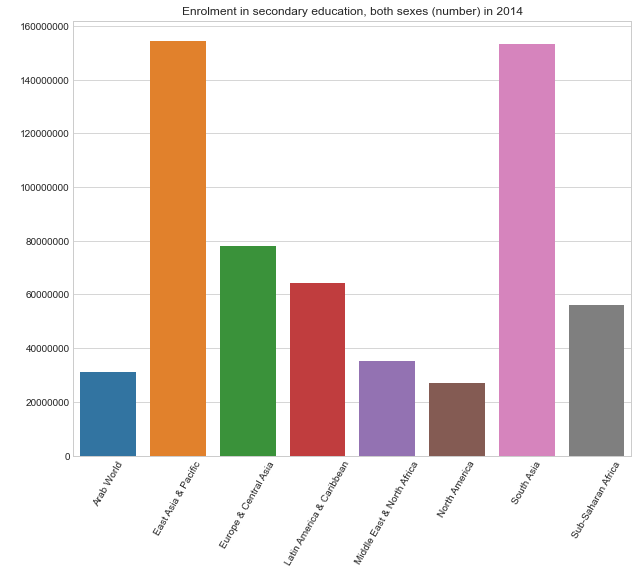

In [143]:
plot_barplot(secondary_selected_region, YEAR)

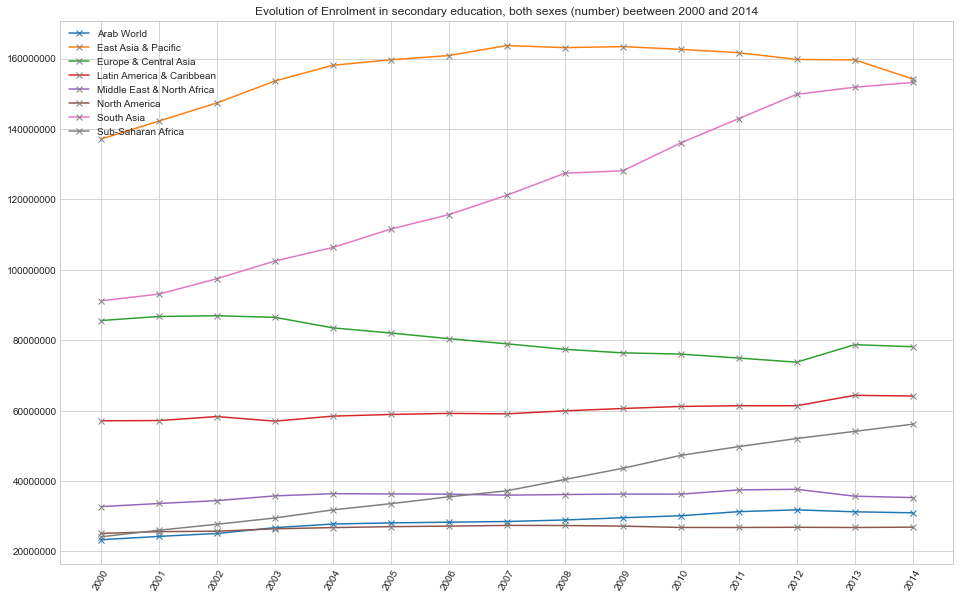

In [47]:
plot_evolution(secondary_selected_region)

### tertiary

Mediane : 22592102.0 people
Moyenne :27185259.2 people
Ecart Type : 19964807.4


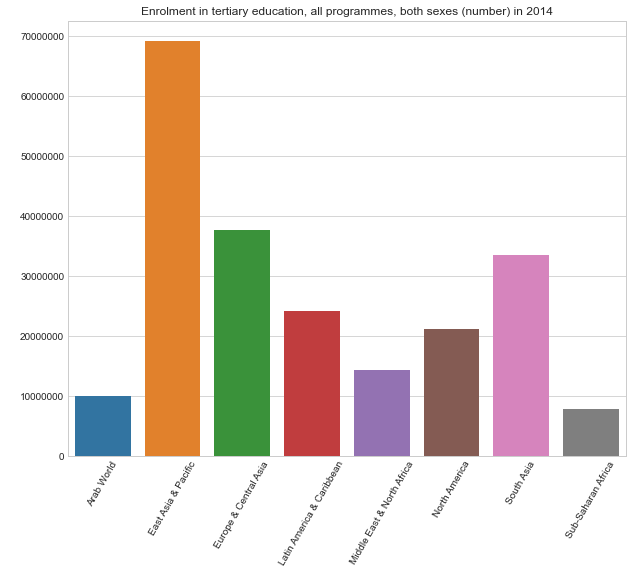

In [144]:
plot_barplot(tertiary_selected_region, YEAR)

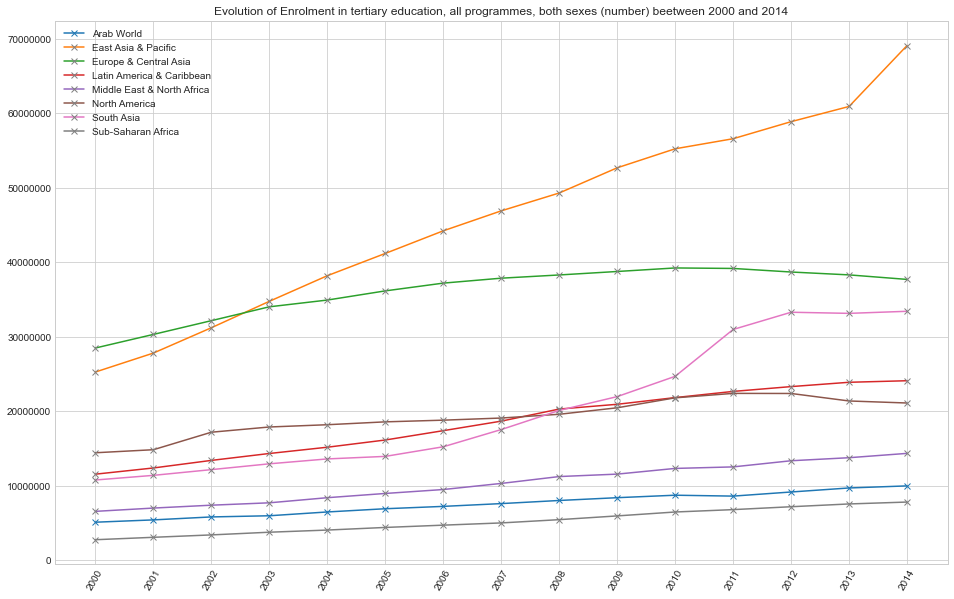

In [49]:
plot_evolution(tertiary_selected_region)

### Internet

In [50]:
internet_selected_region.loc[1375,'2014':'2016']=internet_selected_region.loc[1375,'2013']

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Mediane : 50.2 people
Moyenne :48.9 people
Ecart Type : 20.7


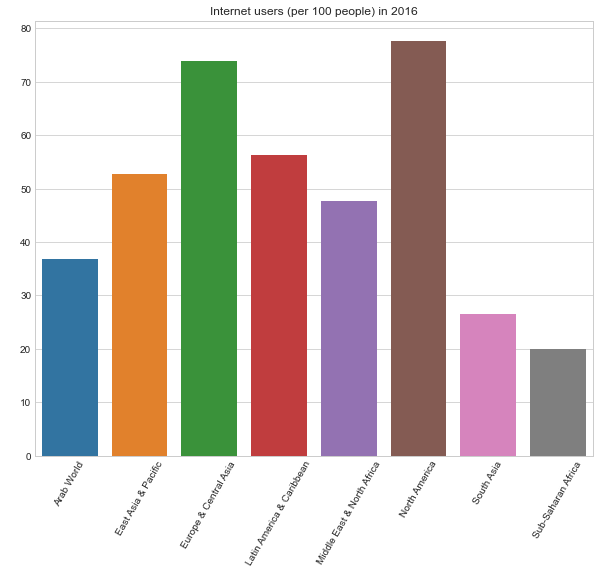

In [145]:
plot_barplot(internet_selected_region,'2016')

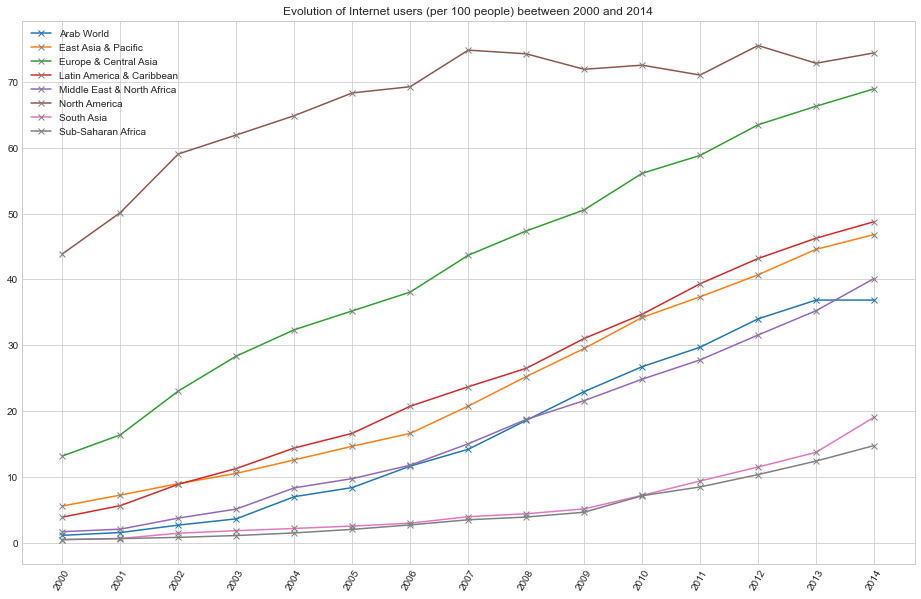

In [52]:
plot_evolution(internet_selected_region)

On voit que :
   - Au niveau de la population lycée et université, l'Asie du sud, et de l'est/pacifique semblent une cible de choix. En effet, ces régions très peuplés possedent le plus haut nombre de personnes scolarisée + sont en augmentation
   - cependant, l'accès à internert de ces pays est moindre que d'autre région du monde à l'heure actuelle\
-> l'Europe et Asie du centre + Amérique du Nord semblent donc les plus pertinent aujourd'hui
   

# Pays

## trouver la population générale

In [53]:
# get the total population indicator
total_population=df_indicator_description['Series Code'][df_indicator_description[
    'Indicator Name'].str.contains('Population, total')].item()
total_population


'SP.POP.TOTL'

In [54]:
# je viens filter mon data_set des pays avec le code -> population de ces pays pour 2016
total_population_countries = data[data[
    'Indicator Code']==total_population]
total_population_countries=total_population_countries.fillna(method='ffill', axis=1)
total_population_countries = total_population_countries[['Country Code', '2016']]
total_population_countries=total_population_countries[total_population_countries['2016'] != 'SP.POP.TOTL']

8741154.5


/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


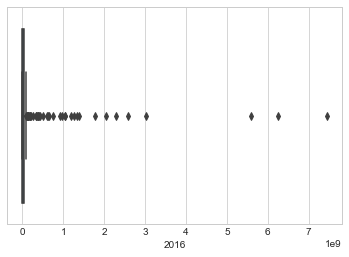

In [55]:
sns.boxplot(total_population_countries['2016'])
print(total_population_countries['2016'].median())

La Chine et l'Inde sont clairement identifiables !

## Fonctions

In [57]:
def select_countries_pop(selection_data, population_data):
    '''Prend la population générale en 2016 et data pays
    retourne les pays dont la population est supérieure à la médiane'''
    population_50 = population_data[population_data['2016']>population_data['2016'].median()]
    selection_data_pop_50 = selection_data[selection_data['Country Code'].isin(list(population_50['Country Code']))] 
    return selection_data_pop_50


In [58]:
def assigne_score(row, q1, q2, q3, internet=False):
    if internet :
        return assigne_score_internet(row, q1, q2, q3, internet)
    else :
        if row<q1:
            return -50
        elif row>=q1 and row<q2 :
            return -25
        elif row>=q2 and row<q3 :
            return 25
        else : 
            return 75
        
def assigne_score_internet(row, q1, q2, q3, internet):
    if row<q1:
        return -150
    elif row>=q1 and row<q2 :
        return -50
    elif row>=q2 and row<q3 :
        return 50
    else : 
        return 100

def score_attractivite(selection_data, indicateur, countries_score, column_to_select='2015', internet=False):
    '''
    Prend data et un indicateur
    Classe la donnée puis met uns score dattractivité selon IQ
    :q1 -> -50 | q1:q2 -> -25 | q2:q3 -> 25 | q3: -> 75
    sauf si internet ->
    :q1 -> -150 | q1:q2 -> -50 | q2:q3 -> 50 | q3: -> 100
    '''
    selection_data = selection_data[selection_data['Indicator Code']==indicateur].sort_values(column_to_select)
    q1 = selection_data[column_to_select].quantile(.25)
    q2 = selection_data[column_to_select].quantile(.5)
    q3 = selection_data[column_to_select].quantile(.75)
    
    selection_data[f'score_{indicateur}'] = selection_data[column_to_select].apply(lambda x : assigne_score(x, q1, q2, q3, internet))
    selection_data = selection_data[['Country Code', f'score_{indicateur}']]
    countries_score = countries_score.merge(selection_data, how='inner', on='Country Code')
    return countries_score


## Selectionner dans la data les data des pays

In [59]:
select_countries_in_data_interest = data_interest[data_interest['Country Code'].isin(df_countries['Country Code'])]

In [60]:
# Je selectionne les pays dont il y a moins de 8 valeurs manquantes entre 2008 et 2016
#je rempli les vleurs manquantes par les précédentes
select_countries_in_data_interest = select_countries_in_data_interest[select_countries_in_data_interest.iloc[:, 12:20].isnull().sum(axis=1)<8]
select_countries_in_data_interest = select_countries_in_data_interest.fillna(method='ffill', axis=1).drop(columns='2017')
select_countries_in_data_interest.dropna(inplace=True)


In [61]:
#Retourne deux dataframes : 
#select_countries_pop_50 contient les pays au dessus de la mediane de la pop totale avec les indicateurs
#countries_select_score contient que les nom/code pays au dessus de la mediane de la pop totale
select_countries_pop_50 = select_countries_pop(select_countries_in_data_interest, total_population_countries)
countries_select_score =  select_countries_pop_50.groupby(['Country Code', 'Country Name']).sum()

In [62]:
for indicator_key, indicateur_description in indicators.items():
    if 'internet' in indicateur_description.lower() :
        countries_select_score = score_attractivite(select_countries_pop_50, 
                                                    indicator_key, countries_select_score, internet=True)
    else :
        countries_select_score = score_attractivite(select_countries_pop_50,  
                                                    indicator_key, countries_select_score,)



In [208]:
countries_select_score.shape

(85, 9)

In [63]:
countries_select_score.head()

,Country Code,score_SE.SEC.ENRL,score_SP.SEC.UTOT.IN,score_SE.TER.ENRL,score_SP.TER.TOTL.IN,score_IT.NET.USER.P2
0,AFG,25,25,-25,25,-150
1,AGO,-50,25,-25,-25,-150
2,ARG,25,25,75,25,100
3,AUS,25,-50,25,-25,100
4,AUT,-50,-50,-25,-50,100


In [64]:
countries_select_score['final_score'] = countries_select_score.sum(axis=1)
countries_select_score = countries_select_score.sort_values('final_score', ascending=False)
countries_select_score = countries_select_score.merge(df_countries[['Country Code', 
                                                        'Short Name','Region']], how='left', on='Country Code')

/var/folders/rm/v4zjj0453jl2v5pmlsvnhgnc0000gn/T/ipykernel_25681/677171819.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countries_select_score['final_score'] = countries_select_score.sum(axis=1)


In [65]:
top_15_countries = countries_select_score.iloc[:15, :][['Country Code', 'Short Name','final_score', 'Region']]


In [66]:
top_15_countries

,Country Code,Short Name,final_score,Region
0,JPN,Japan,400,East Asia & Pacific
1,USA,United States,400,North America
2,RUS,Russia,400,Europe & Central Asia
3,GBR,United Kingdom,350,Europe & Central Asia
4,MEX,Mexico,350,Latin America & Caribbean
5,DEU,Germany,350,Europe & Central Asia
6,CHN,China,350,East Asia & Pacific
7,BRA,Brazil,350,Latin America & Caribbean
8,TUR,Turkey,350,Europe & Central Asia
9,IRN,Iran,350,Middle East & North Africa


In [67]:
region_score = countries_select_score.groupby('Region').sum()
region_score = region_score.sort_values('final_score', ascending=False)
region_score

,score_SE.SEC.ENRL,score_SP.SEC.UTOT.IN,score_SE.TER.ENRL,score_SP.TER.TOTL.IN,score_IT.NET.USER.P2,final_score
Region,,,,,,
East Asia & Pacific,400,300,500,425,150,1775
Europe & Central Asia,50,-225,375,-175,1750,1775
Latin America & Caribbean,75,-100,325,25,350,675
Middle East & North Africa,100,175,175,125,100,675
North America,75,75,75,75,100,400
South Asia,300,300,100,250,-700,250
Sub-Saharan Africa,-400,250,-850,75,-2750,-3675


In [160]:
region_score_15 = top_15_countries.groupby('Region', as_index=False).sum()
region_score_15 = region_score_15.sort_values('final_score')
region_score_15

,Region,final_score
5,Sub-Saharan Africa,300
3,Middle East & North Africa,350
4,North America,400
2,Latin America & Caribbean,700
0,East Asia & Pacific,1550
1,Europe & Central Asia,1750


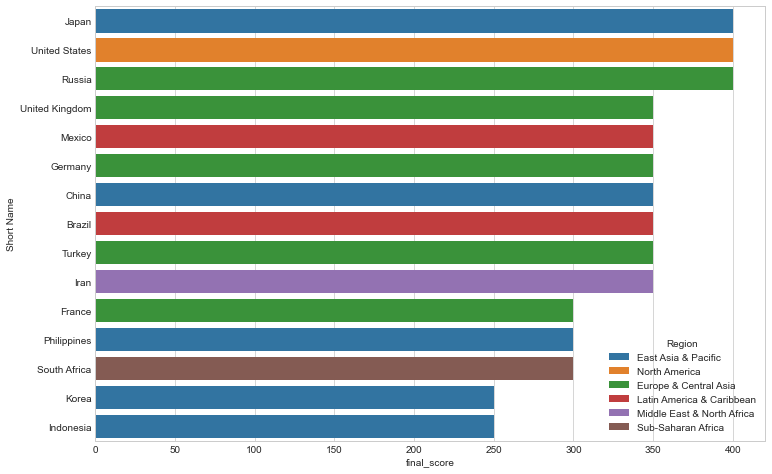

In [176]:
plt.figure(figsize=(12,8))

sns.barplot(x='final_score', y='Short Name', data=top_15_countries, orient='h', hue='Region', dodge=False);

## evolution

In [146]:
def plot_evolution_(data, indicateur_code, indicators, range_):
    colors = ['r', 'b', 'g', 'y', 'orange', 'purple', 
              'k', 'm', 'w', 'powderblue', 'pink', 'olivedrab', 'aquamarine','bisque', 'darkblue']
    data_select = data[data['Indicator Code'] == indicateur_code]
    plt.figure(figsize=(12,7))
    for i in range (range_):
        try : 
            plt.plot(data_select.iloc[i,12:-1], marker='x', color=colors[i])
            plt.ticklabel_format(style='plain', axis='y')
            
        except :
            'not the good format'
   
    plt.title(f'Evolution of {indicators[indicateur_code]} beetween 2008 and 2015');
    plt.xticks(rotation=60)
    plt.legend(data_select.iloc[:,:]['Country Name'], loc="upper left")
    plt.show()
    return

In [130]:
# je recupere les infos + je sépare mon dataset avzec chine et indes car les données de populations 
#sont trop importantes par rapport aux autres pays
evolution = select_countries_pop_50[select_countries_pop_50
                                    ['Country Code'].isin(list(region_score_15['Country Code']))]
evolution_india_china = evolution[evolution['Country Code'].isin(['IND', 'CHN'])]
evolution_less_china_india = evolution[~evolution['Country Code'].isin(['IND', 'CHN'])]

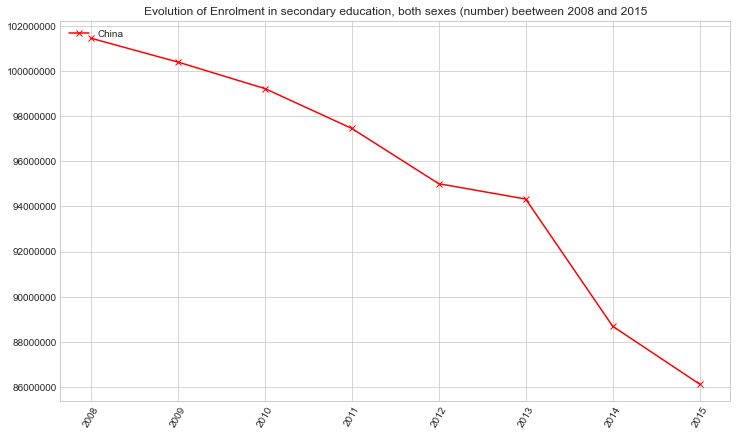

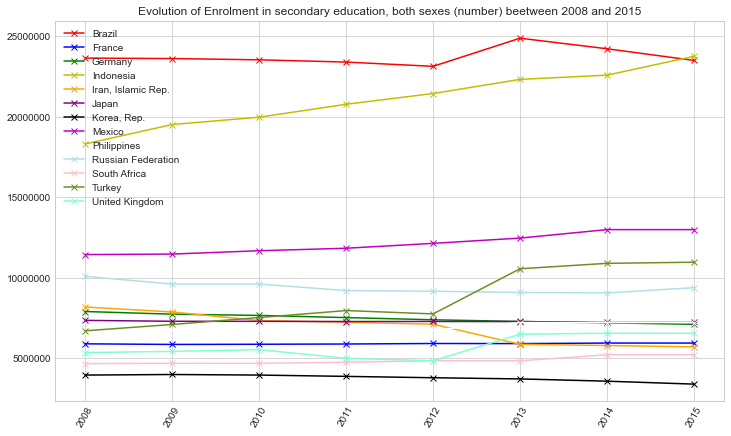

In [147]:
plot_evolution_(evolution_india_china, 'SE.SEC.ENRL', indicators, 2)
plot_evolution_(evolution_less_china_india, 'SE.SEC.ENRL', indicators, 13)

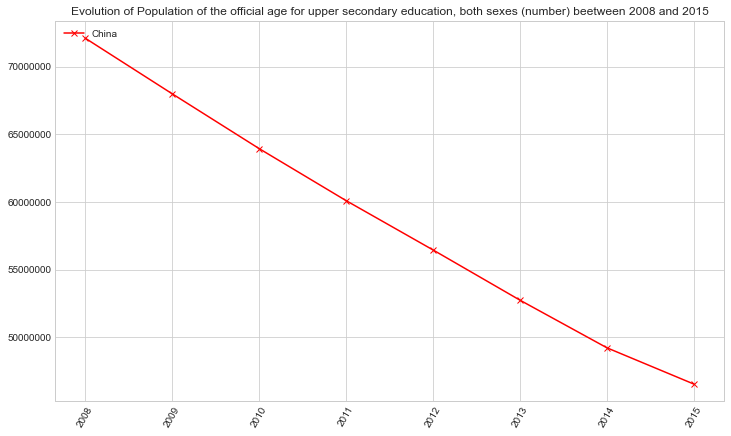

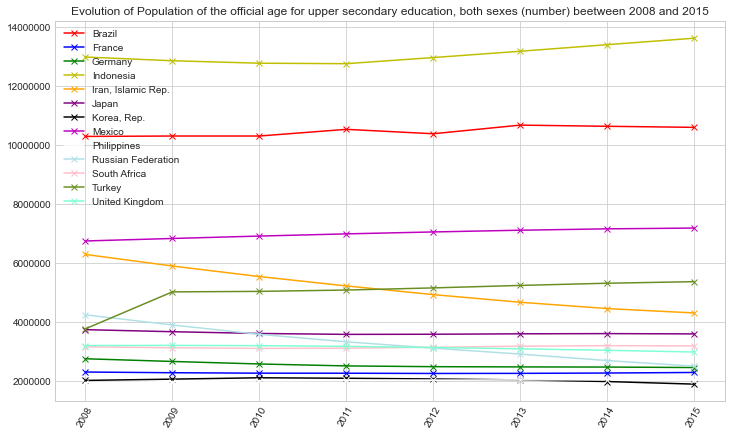

In [148]:
plot_evolution_(evolution_india_china, 'SP.SEC.UTOT.IN', indicators, 2)
plot_evolution_(evolution_less_china_india, 'SP.SEC.UTOT.IN', indicators, 13)

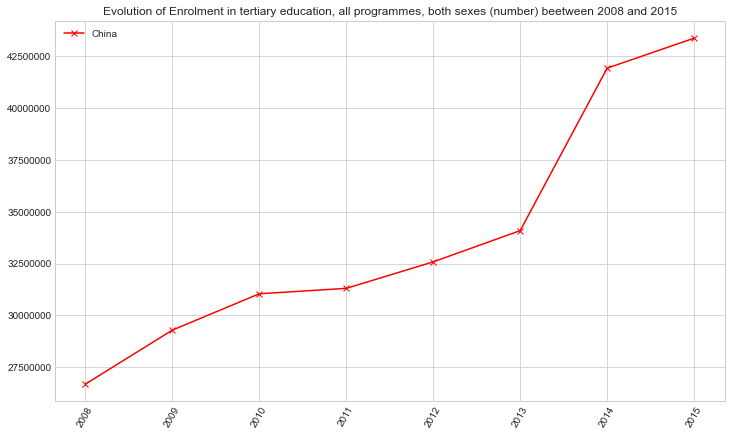

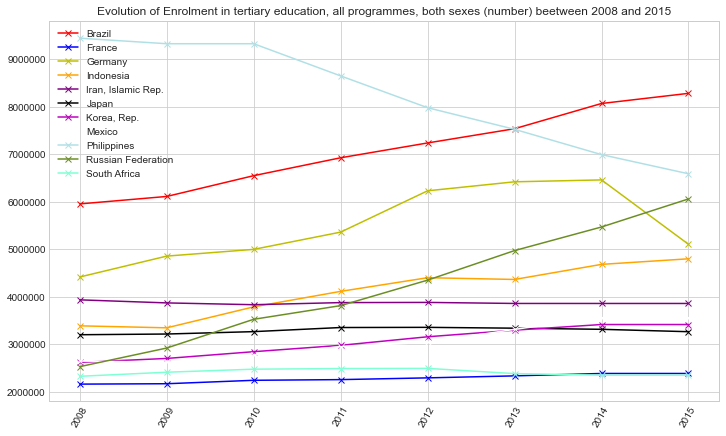

In [149]:
plot_evolution_(evolution_india_china, 'SE.TER.ENRL', indicators, 2)
plot_evolution_(evolution_less_china_india, 'SE.TER.ENRL', indicators, 13)

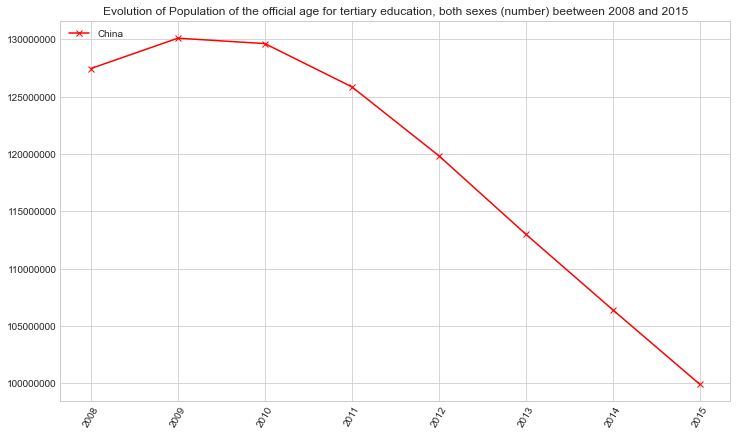

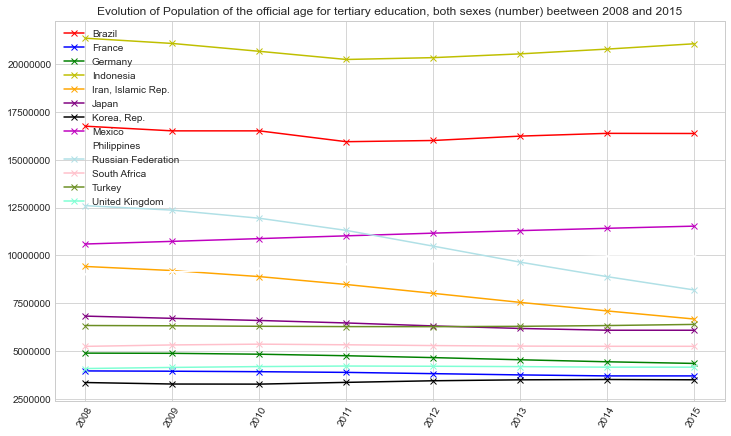

In [150]:
plot_evolution_(evolution_india_china, 'SP.TER.TOTL.IN', indicators, 2)
plot_evolution_(evolution_less_china_india, 'SP.TER.TOTL.IN', indicators, 13)

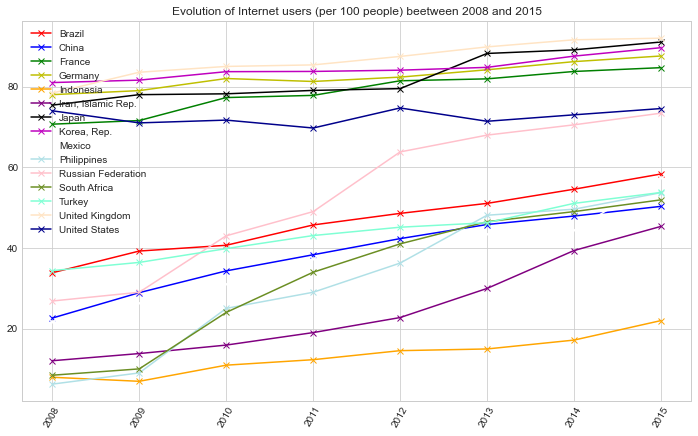

In [151]:
plot_evolution_(evolution, 'IT.NET.USER.P2', indicators, 15)


# Autre méthode que j'ai abandonné

Cette méthode utilisait une méthode de filtre en séléctionnant en fonction des indicateurs les 20 meilleurs pays. Puis l'objectif était de voir quels pays se trouvaient selectionnés dans les différents filtres. -> abandon car méthode des scores est plus efficace

In [79]:
def calcul_pop_acces_internet(data, data_internet):
    data_merge = data.merge(data_internet, how='inner', on='Country Code')
    data_merge['population_cible_acces_internet'] = (data_merge['2015']*data_merge['2016'])/100
    return data_merge.drop(columns='2016')

In [80]:
def select_data_quantile(data, colonne, quantile=.5):
    quantile_data = data[colonne].quantile(quantile)
    return data[data[colonne]>quantile_data]

In [81]:
#Il y a trois indicateurs dans ma séléction, possibilité de changer la variable indicateur_indice 
#et relancer les cellules
indicateur_indice = 0 #entre 0 et 2

secondary_selected_countries = select_countries_in_data_interest[select_countries_in_data_interest['Indicator Code']==\
                               list(secondary_indicator_interests_code.keys())[indicateur_indice]]
tertiary_selected_countries = select_countries_in_data_interest[select_countries_in_data_interest['Indicator Code']==\
                               list(tertiary_indicator_interests_code.keys())[indicateur_indice]]
internet_selected_countries = select_countries_in_data_interest[select_countries_in_data_interest['Indicator Code']==\
                               list(internet_indicator_interests_code.keys())[0]]                                                                                      

## Sélectionner les pays avec de la donnée pour internet

select_countries_in_data_interest = data_interest[data_interest['Country Code'].isin(df_countries['Country Code'])]


In [82]:
# Je selectionne les pays dont il y a moins de 4 valeurs manquantes entre 2000 et 2016
#je rempli les vleurs manquantes par les précédentes
print(internet_selected_countries.shape)
internet_selected_countries = internet_selected_countries[internet_selected_countries.iloc[:, 4:20].isnull().sum(axis=1)<10]
internet_selected_countries = internet_selected_countries.fillna(method='ffill', axis=1)
print(internet_selected_countries.shape)


(203, 21)
(203, 21)


In [83]:
internet_selected_countries = internet_selected_countries[['Country Code',
                                                           '2016']]


__INUTILE CAR METHODE CHANGEE__

In [84]:
pop_acces_internet = internet_selected_countries.merge(total_population_countries, how='inner', on='Country Code')

In [85]:
pop_acces_internet['people_having_internet_2016'] = (pop_acces_internet['2016_x']*pop_acces_internet['2016_y'])/100

In [86]:
pop_acces_internet = pop_acces_internet[['Country Code', 'people_having_internet_2016']]

/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='people_having_internet_2016'>

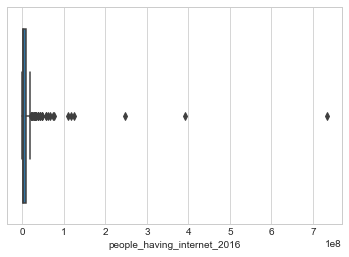

In [87]:
sns.boxplot(pop_acces_internet['people_having_internet_2016'])

__Ma séléction de pays sur internet se fera donc sur la médiane et non la moyenne__

In [88]:
best_countries_people_internet_50 = select_data_quantile(pop_acces_internet, 'people_having_internet_2016', 0.5)['Country Code']
best_countries_people_internet_50.head(5)

0    AFG
2    DZA
4    AGO
6    ARG
9    AUS
Name: Country Code, dtype: object

## Selection sur l'indicateur

### Secondaire

In [89]:
# Je selectionne les pays dont il y a moins de 4 valeurs manquantes entre 2008 et 2015 
#je rempli les vleurs manquantes par les précédentes
secondary_selected_countries = secondary_selected_countries[secondary_selected_countries.iloc[:, 12:20].isnull().sum(axis=1)<4]
secondary_selected_countries = secondary_selected_countries.fillna(method='ffill', axis=1)


In [90]:
secondary_selected_countries = secondary_selected_countries[['Country Name', 'Country Code', 
                                                            'Indicator Name', 'Indicator Code', '2015']]

In [91]:
pop_secondary_acces_internet =calcul_pop_acces_internet(secondary_selected_countries, internet_selected_countries)

In [92]:
best_countries_secondary = select_data_quantile(pop_secondary_acces_internet, 'population_cible_acces_internet', 0.75)

In [93]:
best_countries_secondary = best_countries_secondary.sort_values('population_cible_acces_internet')
best_countries_secondary['Country Name']

115               Myanmar
84                  Kenya
151             Sri Lanka
64                  Ghana
134               Romania
36                  Chile
52                Ecuador
16                Belgium
128                  Peru
172               Ukraine
83             Kazakhstan
117           Netherlands
113               Morocco
178         Venezuela, RB
176            Uzbekistan
124              Pakistan
130                Poland
2                 Algeria
9               Australia
102              Malaysia
32                 Canada
140          Saudi Arabia
13             Bangladesh
150                 Spain
38               Colombia
149          South Africa
79                  Italy
76     Iran, Islamic Rep.
6               Argentina
87            Korea, Rep.
163              Thailand
121               Nigeria
53       Egypt, Arab Rep.
129           Philippines
60                 France
75              Indonesia
173        United Kingdom
63                Germany
168         

### Tertiaire

In [94]:
# Je selectionne les pays dont il y a moins de 4 valeurs manquantes entre 2008 et 2015 
#je rempli les vleurs manquantes par les précédentes
tertiary_selected_countries = tertiary_selected_countries[tertiary_selected_countries.iloc[:, 12:20].isnull().sum(axis=1)<4]
tertiary_selected_countries = tertiary_selected_countries.fillna(method='ffill', axis=1)

In [95]:
tertiary_selected_countries = tertiary_selected_countries[['Country Name', 'Country Code', 
                                                            'Indicator Name', 'Indicator Code', '2015']]

In [96]:
pop_terciary_acces_internet =calcul_pop_acces_internet(tertiary_selected_countries, internet_selected_countries)
best_countries_tertiary = select_data_quantile(pop_terciary_acces_internet, 'population_cible_acces_internet', 0.75)
best_countries_tertiary = best_countries_tertiary.sort_values('population_cible_acces_internet')
best_countries_tertiary['Country Name']

128               Romania
15                Belarus
10                Austria
13             Bangladesh
116               Nigeria
147                Sweden
16                Belgium
61                 Greece
79             Kazakhstan
108               Morocco
122                  Peru
140          South Africa
2                 Algeria
97               Malaysia
113           Netherlands
34                  Chile
159               Ukraine
152              Thailand
75                  Italy
50       Egypt, Arab Rep.
133          Saudi Arabia
166               Vietnam
165         Venezuela, RB
9               Australia
124                Poland
71              Indonesia
36               Colombia
141                 Spain
123           Philippines
6               Argentina
104                Mexico
56                 France
161        United Kingdom
72     Iran, Islamic Rep.
59                Germany
82            Korea, Rep.
156                Turkey
77                  Japan
23          

In [201]:
best_coutries = best_countries_tertiary[best_countries_tertiary['Country Name'].isin(list(best_countries_secondary['Country Name']))]
best_coutries

,Country Name,Country Code,Indicator Name,Indicator Code,2015,population_cible_acces_internet
128,Romania,ROU,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,541653.00,3.223049e+05
13,Bangladesh,BGD,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,2068355.00,3.774115e+05
116,Nigeria,NGA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1513371.00,3.884823e+05
16,Belgium,BEL,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,504745.00,4.366877e+05
79,Kazakhstan,KAZ,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,658413.00,5.056612e+05
108,Morocco,MAR,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,877404.00,5.112742e+05
122,Peru,PER,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1150620.00,5.230919e+05
140,South Africa,ZAF,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1018543.00,5.500132e+05
2,Algeria,DZA,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,1289474.00,5.537714e+05
97,Malaysia,MYS,"Enrolment in tertiary education, all programme...",SE.TER.ENRL,817587.00,6.441630e+05


# Evolution des pays 

Afin de voir l'évolution, plusieurs méthodes s'offrent à moi :
- rester sur mon analyse des régions et me projetter avec celle ci
- faire un graphe comme pour les régions pour voir la tendance sur les dernieres années -> Done
- faire un modèle prédictif en time séries (un peu énervés comme méthode)
- voir si j'ai des données intéréssantes sur les colones 2020->2050

__Je vais partir sur la méthode incluant les colones 2020->2040__

In [98]:
columns_futur = ['2020', '2025', '2030', '2035', '2040']

In [99]:
data_selection_projection = data[['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name']+columns_futur]

In [100]:
indicators_with_data = data_selection_projection[~data_selection_projection['2040'].isnull()]

In [101]:
len(indicators_with_data)

51436

In [102]:
a = indicators_with_data.groupby('Indicator Name').sum()
a.reset_index(inplace=True)
a = a['Indicator Name'].to_list()

In [103]:
# je selectionne à la mano les indicateurs qui me semblent pertinants
for i in a :
    print(i)

Wittgenstein Projection: Mean Years of Schooling. Age 15+. Gender Gap
Wittgenstein Projection: Mean Years of Schooling. Age 25+. Gender Gap
Wittgenstein Projection: Mean years of schooling. Age 0-19. Female
Wittgenstein Projection: Mean years of schooling. Age 0-19. Male
Wittgenstein Projection: Mean years of schooling. Age 0-19. Total
Wittgenstein Projection: Mean years of schooling. Age 15+. Female
Wittgenstein Projection: Mean years of schooling. Age 15+. Male
Wittgenstein Projection: Mean years of schooling. Age 15+. Total
Wittgenstein Projection: Mean years of schooling. Age 15-19. Female
Wittgenstein Projection: Mean years of schooling. Age 15-19. Male
Wittgenstein Projection: Mean years of schooling. Age 15-19. Total
Wittgenstein Projection: Mean years of schooling. Age 20-24. Female
Wittgenstein Projection: Mean years of schooling. Age 20-24. Male
Wittgenstein Projection: Mean years of schooling. Age 20-24. Total
Wittgenstein Projection: Mean years of schooling. Age 20-39. Fema

In [104]:
indicator_futur_interest = [
    'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
    'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total'
]

In [105]:
indicator_futur_interest_dict={}
indicator_futur_interest_with_code = indicators_with_data[['Indicator Name', 'Indicator Code']][
    indicators_with_data['Indicator Name'].isin(indicator_futur_interest)]
indicator_futur_interest_with_code = indicator_futur_interest_with_code.groupby('Indicator Code').min().reset_index()
for index, row in indicator_futur_interest_with_code.iterrows():
    indicator_futur_interest_dict[row['Indicator Code']]=row['Indicator Name']
    
indicator_futur_interest_dict

{'PRJ.POP.ALL.3.MF': 'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
 'PRJ.POP.ALL.4.MF': 'Wittgenstein Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total'}

On peut suposer, au vu des courbes d'évolution de l'accès à internet, que d''ici 10 ans, tous les pays auront au moins 90% de la population avec un accès à internet

## Niveau mondial 

In [106]:
world_data = indicators_with_data[indicators_with_data['Country Code']=='WLD']
indicators_with_data = indicators_with_data[indicators_with_data['Country Code']!='WLD']

In [107]:
world_indicators_selected_with_data = world_data[
    world_data['Indicator Name'].isin(indicator_futur_interest)]
world_indicators_selected_with_data.head()

,Country Name,Country Code,Indicator Code,Indicator Name,2020,2025,2030,2035,2040
91610,World,WLD,PRJ.POP.ALL.4.MF,Wittgenstein Projection: Population in thousan...,841773.22,964758.42,1097776.66,1238213.32,1384584.58
91616,World,WLD,PRJ.POP.ALL.3.MF,Wittgenstein Projection: Population in thousan...,1599479.25,1781898.44,1967258.22,2151416.19,2330335.99


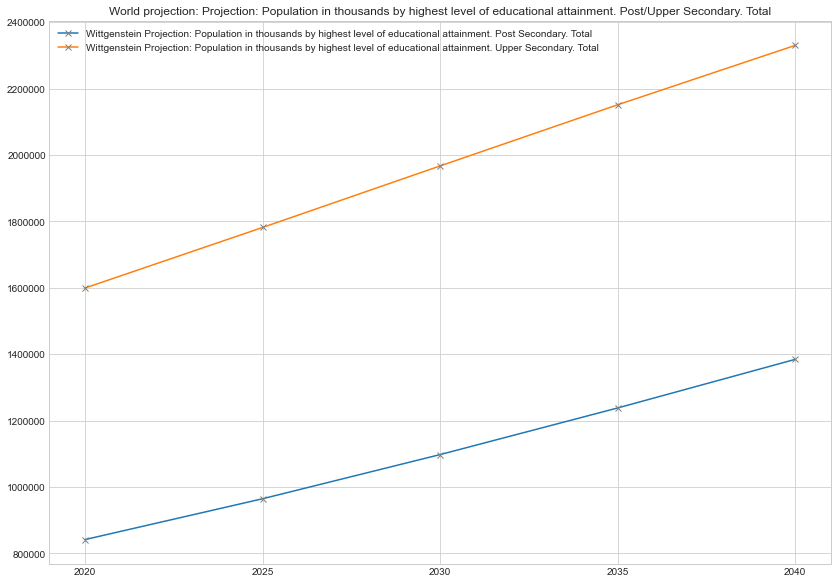

In [152]:
plt.figure(figsize=(14,10))
plt.plot(world_indicators_selected_with_data.iloc[0,4:],marker='x', mec='grey')
plt.plot(world_indicators_selected_with_data.iloc[1,4:],marker='x', mec='grey')
plt.ticklabel_format(style='plain', axis='y')
plt.title('World projection: Projection: Population in thousands by highest level of educational attainment. Post/Upper Secondary. Total')
plt.legend(world_indicators_selected_with_data['Indicator Name']);

## Sur tout les pays dont j'ai de la donnée

In [109]:
indicators_selected_with_data = indicators_with_data[
    indicators_with_data['Indicator Name'].isin(indicator_futur_interest)]

In [110]:
print(f"J'ai {len(indicators_selected_with_data['Country Name'].unique())} pays différents avec de la donnée sur le futur 🚀")

J'ai 166 pays différents avec de la donnée sur le futur 🚀


In [111]:
countries_name_evol = indicators_selected_with_data.groupby(['Country Code', 'Country Name']).min()

In [112]:
# pour calculer l'évolution je vais faire des soustraction
indicators_selected_with_data['evolution_10_y']= indicators_selected_with_data['2030']-indicators_selected_with_data['2020']
indicators_selected_with_data['evolution_20_y']= indicators_selected_with_data['2040']-indicators_selected_with_data['2030']




/Users/maximedupouy/.pyenv/versions/3.8.6/envs/lewagon/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [113]:
for indicator_key, indidator_description in indicator_futur_interest_dict.items():
    countries_name_evol = score_attractivite(indicators_selected_with_data, indicator_key, countries_name_evol, 'evolution_10_y' )
    countries_name_evol = score_attractivite(indicators_selected_with_data, indicator_key, countries_name_evol, 'evolution_20_y' )

In [114]:
score_evolution = countries_name_evol.iloc[:, 8:].sum(axis=1)
score_evolution = pd.concat([countries_name_evol.iloc[:, :2], score_evolution], axis=1)
score_evolution = score_evolution.sort_values(0)

In [115]:
# 15 pays les mieux notés en terme de croissance
coutries_best_evol = score_evolution.iloc[:15, :]
coutries_best_evol = coutries_best_evol.merge(df_country, how='inner', on='Country Code')
coutries_best_evol = list(coutries_best_evol['Short Name'])
for country in coutries_best_evol : 
    print(country)

Aruba
Estonia
Cabo Verde
Comoros
Georgia
São Tomé and Principe
Suriname
Slovenia
Guyana
New Caledonia
Bhutan
Montenegro
French Polynesia
Malta
Iceland


## Sur nos pays selectionnés de tout à l'heure

In [116]:
countries_selected_before = indicators_selected_with_data[indicators_selected_with_data
                              ['Country Code'].isin(list(top_15_countries['Country Code']))]

In [117]:
countries_selected_before_secondary = countries_selected_before[countries_selected_before['Indicator Code']=='PRJ.POP.ALL.4.MF']
countries_selected_before_tertiary = countries_selected_before[countries_selected_before['Indicator Code']=='PRJ.POP.ALL.3.MF']

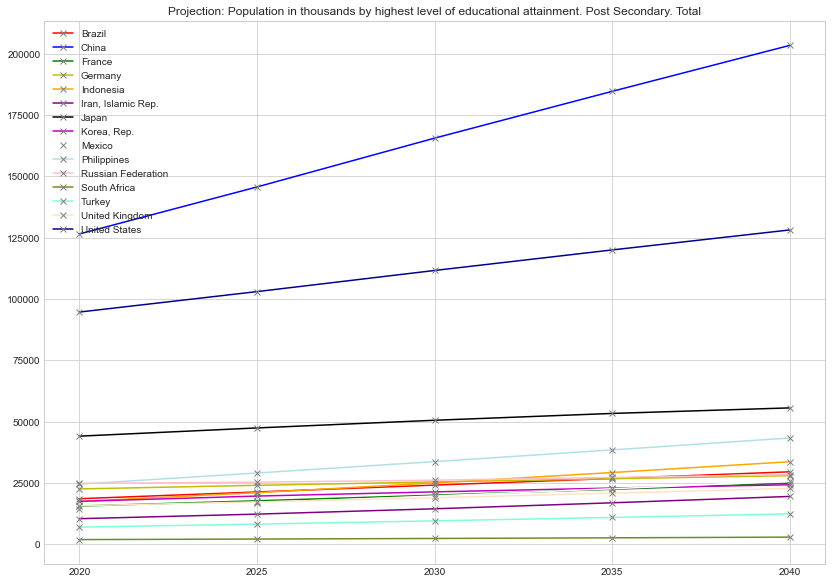

In [163]:
plt.figure(figsize=(14, 10))
for i in range (15):
    colors = ['r', 'b', 'g', 'y', 'orange', 'purple', 
              'k', 'm', 'w', 'powderblue', 'pink', 'olivedrab', 'aquamarine','bisque', 'darkblue']
    plt.plot(countries_selected_before_secondary.iloc[i,4:9],marker='x', mec='grey', color=colors[i])
    plt.title('Projection: Population in thousands by highest level of educational attainment. Post Secondary. Total')
    plt.legend(countries_selected_before_secondary['Country Name'])

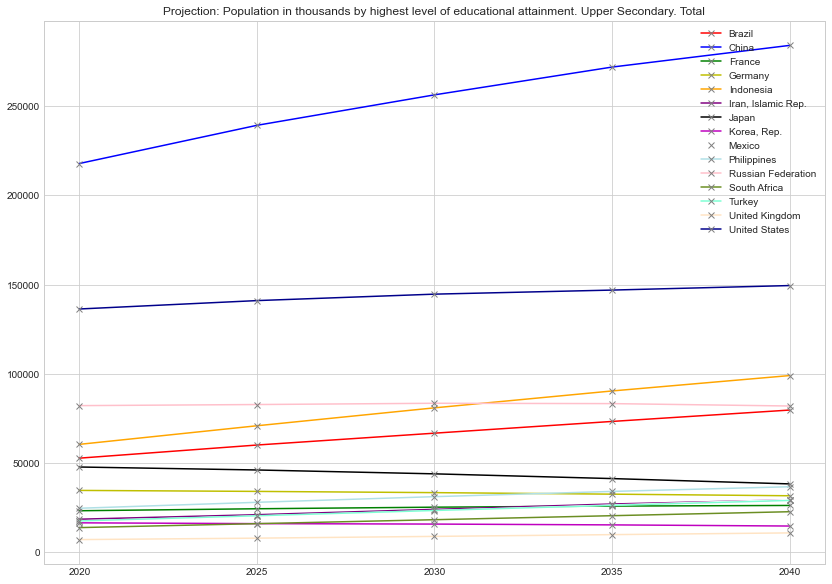

In [164]:
plt.figure(figsize=(14, 10))
for i in range (15):
    colors = ['r', 'b', 'g', 'y', 'orange', 'purple', 
              'k', 'm', 'w', 'powderblue', 'pink', 'olivedrab', 'aquamarine','bisque', 'darkblue']
    plt.plot(countries_selected_before_tertiary.iloc[i,4:9],marker='x', mec='grey', color=colors[i])
    plt.title('Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total')
    plt.legend(countries_selected_before_tertiary['Country Name'])

In [122]:
# je peux updater mes scores obtenue précedement avec l'évolution : 

for indicator_key, indidator_description in indicator_futur_interest_dict.items():
    countries_select_score_update = score_attractivite(indicators_selected_with_data, indicator_key, countries_select_score, 'evolution_10_y' )
    countries_select_score_update = score_attractivite(indicators_selected_with_data, indicator_key, countries_select_score_update, 'evolution_20_y' )
countries_select_score_update.head()

,Country Code,score_SE.SEC.ENRL,score_SP.SEC.UTOT.IN,score_SE.TER.ENRL,score_SP.TER.TOTL.IN,score_IT.NET.USER.P2,final_score,Short Name,Region,score_PRJ.POP.ALL.4.MF_x,score_PRJ.POP.ALL.4.MF_y
0,JPN,75,75,75,75,100,400,Japan,East Asia & Pacific,75,75
1,USA,75,75,75,75,100,400,United States,North America,75,75
2,RUS,75,75,75,75,100,400,Russia,Europe & Central Asia,75,75
3,GBR,75,75,75,25,100,350,United Kingdom,Europe & Central Asia,75,75
4,MEX,75,75,75,75,50,350,Mexico,Latin America & Caribbean,75,75


In [123]:
countries_select_score_update_sum = countries_select_score_update.iloc[:, 1:].sum(axis=1)
countries_select_score_update = pd.concat([countries_select_score_update, countries_select_score_update_sum], axis=1)

/var/folders/rm/v4zjj0453jl2v5pmlsvnhgnc0000gn/T/ipykernel_25681/1366667897.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  countries_select_score_update_sum = countries_select_score_update.iloc[:, 1:].sum(axis=1)


In [124]:
top_update=countries_select_score_update.sort_values(0, ascending=False)
top_15_update = top_update.iloc[:15, :]
top_15_update = top_15_update[['Country Code', 0]].merge(df_country[['Country Code', 'Short Name', 'Region']], how='inner', on='Country Code')
top_15_update


,Country Code,0,Short Name,Region
0,JPN,950,Japan,East Asia & Pacific
1,RUS,950,Russia,Europe & Central Asia
2,USA,950,United States,North America
3,GBR,850,United Kingdom,Europe & Central Asia
4,BRA,850,Brazil,Latin America & Caribbean
5,IRN,850,Iran,Middle East & North Africa
6,TUR,850,Turkey,Europe & Central Asia
7,MEX,850,Mexico,Latin America & Caribbean
8,CHN,850,China,East Asia & Pacific
9,DEU,850,Germany,Europe & Central Asia


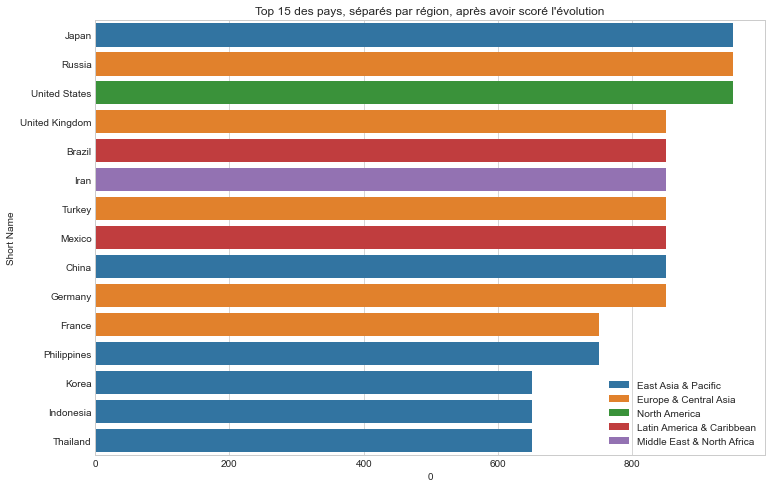

In [158]:
plt.figure(figsize=(12,8))
sns.barplot(x=0, y='Short Name', data=top_15_update, orient='h', hue='Region', dodge=False)
plt.legend(loc="lower right")
plt.title("Top 15 des pays, séparés par région, après avoir scoré l'évolution");

1) Europe -> Angleterre, Russie, Turquie, Allemagne, France

2) Asie -> Japon, Chine, Philippines, Indonésie, Corée

3) USA
